In [1]:
# Import modules
import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [2]:
# Load data in dataframe type
ge_heat_scores = pd.read_csv('https://raw.githubusercontent.com/ZacksAmber/Code/master/Python/GE%20Aviation/GE%20obfuscated_demo_data/heat_scores.csv')
ge_indicator_data = pd.read_csv('https://raw.githubusercontent.com/ZacksAmber/Code/master/Python/GE%20Aviation/GE%20obfuscated_demo_data/indicator_pairs_data%20updated.csv')
ge_obfuscated_demo_data = pd.read_csv('https://raw.githubusercontent.com/ZacksAmber/Code/master/Python/GE%20Aviation/GE%20obfuscated_demo_data/obfuscated_demo_data.csv')

In [3]:
# Join dataframe indicator_data and obfuscated_demo_data as ge_i_o
ge_i_o = ge_indicator_data.join(ge_obfuscated_demo_data.set_index('employee_id'), on = 'employee_id')

In [4]:
# Data Cleansing
# DROP columns: alert_escalation_date, alert_id_fk, insert_date, employee_id, indicator_pairs, ge_hire_data
ge = ge_i_o.drop(columns=["alert_escalation_date", "alert_id_fk", "insert_date", "employee_id"])

In [5]:
# Convert string to Timestamp
ge["ge_hire_date"] = pd.to_datetime(ge["ge_hire_date"])

# Define Now
Now = datetime.datetime.now().year

# Extract year of Timestamp and convert it to numeric
ge["ge_hire_date"] = ge["ge_hire_date"].map(lambda x: Now - x.year)

In [191]:
############
# Module 3 #
############

In [192]:
# MODULE 3 - QUESTION 1

In [193]:
# Unsupervised Machine Learning - factor variables
# Extract rows where alert_category == "Atomic
ge.dropna(inplace=True)
ge3 = ge[ge.alert_category == "Atomic"]

In [194]:
# Extract sample from ge3, drop useless columns
df = ge3.drop(columns=["classification", "alert_category", "alert_type", "score", "risk_factor", "avg_score", "city", "state_name"])
df_f = df.copy()

In [195]:
# Factorize variables
l = ['owner_name', 'hru', 'indicator_pairs', 'person_type', 'person_status', 'ge_hire_date', 'country_name', 'function_group', 'job_function', 'career_band', 'industry_focus_name']

for i in l:
    df_f[i], uniques = pd.factorize(df_f[i])

In [196]:
# Standardization
scaler = StandardScaler()
scaler.fit(df_f)

df_scaled = scaler.transform(df_f)
df_scaled = pd.DataFrame(df_scaled, columns=df_f.columns)

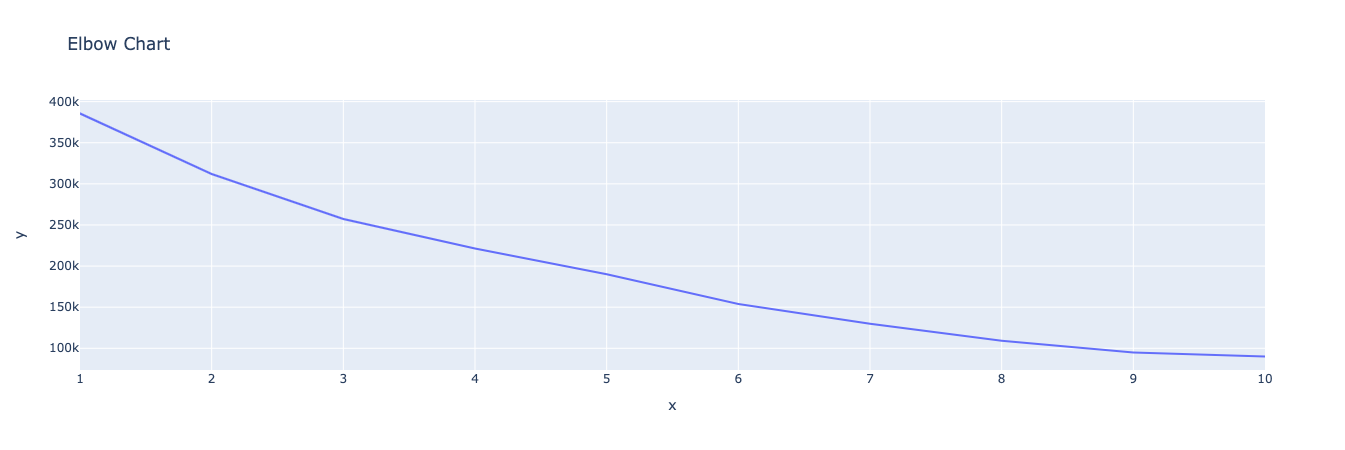

In [197]:
# The number of clusters - Elbow Chart
# The number of columns is the number of dimensions
nCol = df_scaled.shape[1]

ks = range(1, nCol)
inertias = [] # define a empty list

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Draw the Elbow Chart
fig = px.line(x = ks, y = inertias, render_mode = 'svg',
             title = 'Elbow Chart',
             height = 800)
fig.show()

In [198]:
# Unsupervised Machine Learning
kmeans = KMeans(n_clusters=4)

pipeline = make_pipeline(scaler, kmeans) # use pipline to combine scaler & kmeans
pipeline.fit(df_scaled)

scaled_labels = pipeline.predict(df_scaled)
result = pd.crosstab(scaled_labels, ge3["classification"])
result

classification,FP,TP/DE,TP/HIGH,TP/LOW
row_0,,,,
0,7248,26015,92,682
1,644,1197,18,1305
2,1,18,0,0
3,130,1040,12,154


In [199]:
# Unsupervised Machine Learning - dummy variables
# Extract rows where alert_category == "Atomic
ge.dropna(inplace=True)
ge3 = ge[ge.alert_category == "Atomic"]

# Extract sample from ge3, drop useless columns
df = ge3.drop(columns=["classification", "alert_category", "alert_type", "score", "risk_factor", "avg_score", "city", "state_name"])
#df = ge3.drop(columns=["classification", "alert_category", "alert_type", "score", "risk_factor", "avg_score"])

In [200]:
# Get dummy variables
df_d = pd.get_dummies(df)

In [201]:
# Unsupervised Machine Learning
kmeans = KMeans(n_clusters=7)

pipeline = make_pipeline(scaler, kmeans) # use pipline to combine scaler & kmeans
pipeline.fit(df_d)

labels = pipeline.predict(df_d)

In [202]:
result = pd.crosstab(labels, ge3["classification"])
result

classification,FP,TP/DE,TP/HIGH,TP/LOW
row_0,,,,
0,122,1185,30,1262
1,429,15478,12,115
2,905,8532,61,410
3,5984,1720,18,124
4,575,0,0,0
5,7,1337,1,230
6,1,18,0,0


In [ ]:
# MODULE 3 - QUESTION 2

In [166]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = df_d
y = ge3["classification"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100, stratify=y)

In [167]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
# Print the accuracy
print(knn.score(X_train, y_train))

In [168]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.9151033111437711


In [203]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = df_scaled
y = ge3["classification"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100, stratify=y)

In [204]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=4)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [205]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

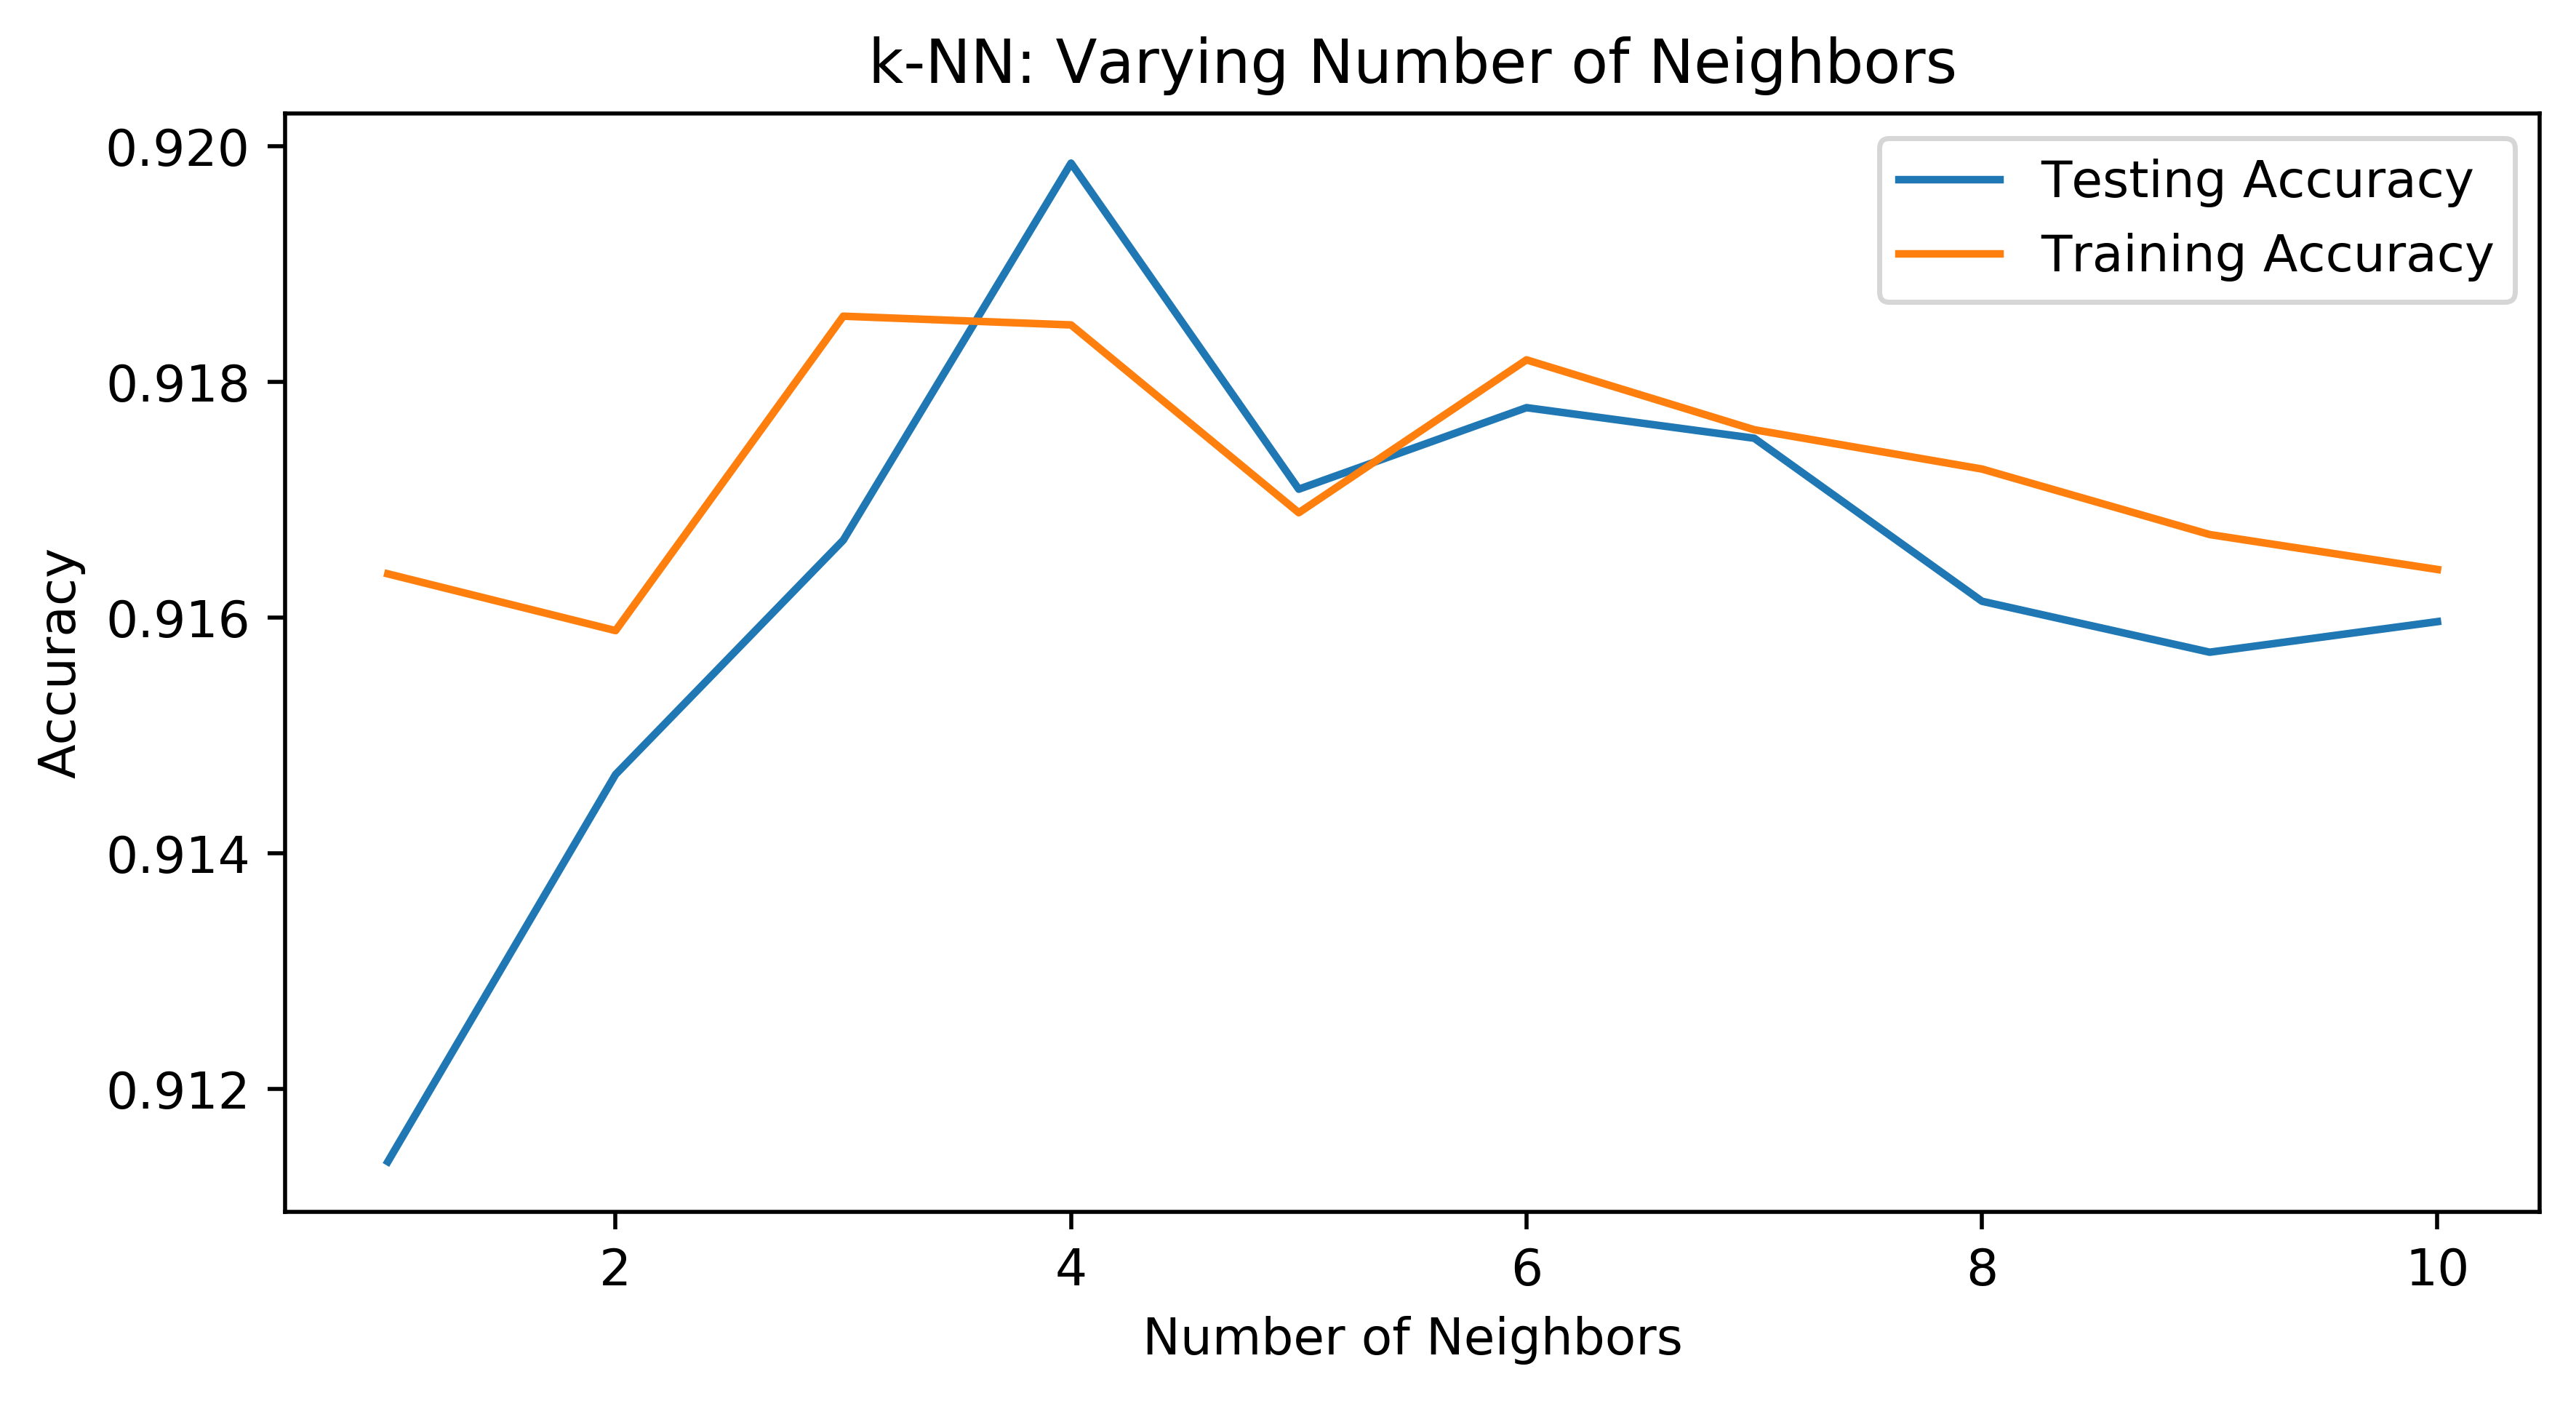

In [206]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['figure.dpi'] = 500 #分辨率
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.show()

In [15]:
pd.DataFrame({"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy})

NameError: name 'train_accuracy' is not defined

In [209]:
y_pred = knn.predict(X_test)

In [210]:
pred = pd.DataFrame({"Classification": y_test, "Predicted classification": y_pred})
#pred.iloc[0] = np.array(y_test)
#pred.iloc[1] = y_pred
pred

,Classification,Predicted classification
30167,FP,FP
86343,TP/DE,TP/DE
86088,TP/DE,TP/DE
57621,FP,FP
123345,TP/DE,TP/DE
...,...,...
108864,TP/DE,TP/DE
93067,TP/DE,TP/DE
83247,TP/DE,TP/DE
57814,FP,FP


In [ ]:
############
# Module 4 #
############

In [ ]:
# MODULE 4 - QUESTION 1

In [6]:
# Unsupervised Machine Learning - factor variables
# Extract rows where alert_category == "Atomic
ge.dropna(inplace=True)
ge4 = ge[ge.alert_category != "Atomic"]

# Extract sample from ge4, drop useless columns
df = ge4.drop(columns=["alert_category", "alert_type", "city", "state_name"])
#df = ge4.drop(columns=["alert_category", "alert_type"])
df_f = df.copy()

# Factorize variables
l = ['score', 'owner_name', 'risk_factor', 'avg_score', 'classification', 'hru', 'indicator_pairs', 'person_type', 'person_status', 'ge_hire_date', 'country_name', 'function_group', 'job_function', 'career_band', 'industry_focus_name']

for i in l:
    df_f[i], uniques = pd.factorize(df_f[i])

In [7]:
# Standardization
scaler = StandardScaler()
scaler.fit(df_f)

df_scaled = scaler.transform(df_f)
df_scaled = pd.DataFrame(df_scaled, columns=df_f.columns)

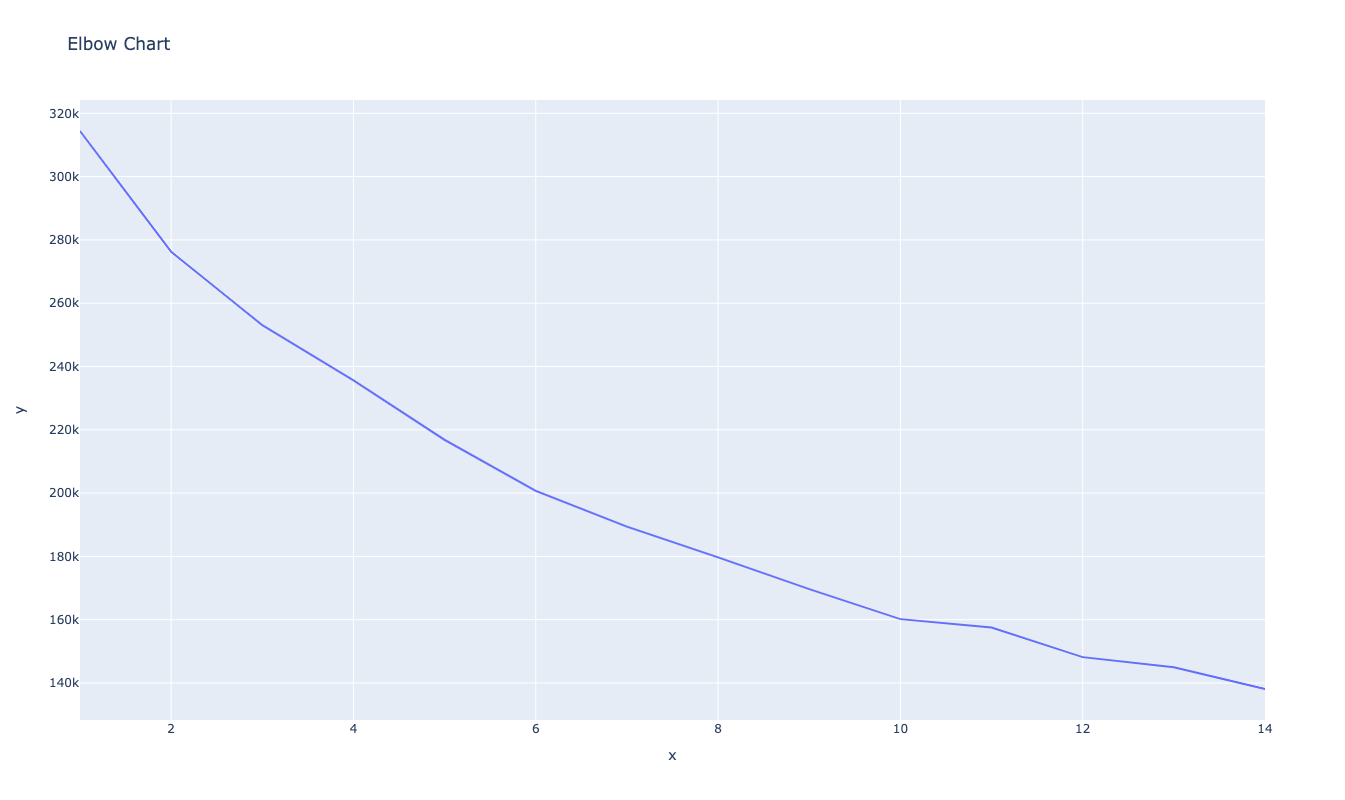

In [8]:
# The number of clusters - Elbow Chart
# The number of columns is the number of dimensions
nCol = df_scaled.shape[1]

ks = range(1, nCol)
inertias = [] # define a empty list

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Draw the Elbow Chart
fig = px.line(x = ks, y = inertias, render_mode = 'svg',
             title = 'Elbow Chart',
             height = 800)
fig.show()

In [10]:
# Unsupervised Machine Learning
kmeans = KMeans(n_clusters=7)

pipeline = make_pipeline(scaler, kmeans) # use pipline to combine scaler & kmeans
pipeline.fit(df_scaled)

scaled_labels = pipeline.predict(df_scaled)
result = pd.crosstab(scaled_labels, ge4["alert_type"])
result

alert_type,Daily_Heat,Monthly_Heat,Weekly_Heat
row_0,,,
0,782,650,608
1,4258,2442,2204
2,1770,1595,1743
3,281,508,379
4,823,1222,1077
5,1027,555,527
6,4,3,0


In [11]:
# Unsupervised Machine Learning - dummy variables
# Extract rows where alert_category == "Atomic
ge.dropna(inplace=True)
ge4 = ge[ge.alert_category != "Atomic"]

# Extract sample from ge3, drop useless columns
df = ge4.drop(columns=["alert_category", "alert_type", "city", "state_name"])

# Get dummy variables
df_d = pd.get_dummies(df)

In [ ]:
# The number of clusters - Elbow Chart
# The number of columns is the number of dimensions
nCol = df_d.shape[1]

ks = range(1, nCol)
inertias = [] # define a empty list

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_d)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Draw the Elbow Chart
fig = px.line(x = ks, y = inertias, render_mode = 'svg',
             title = 'Elbow Chart',
             height = 800)
fig.show()

In [13]:
# Unsupervised Machine Learning
kmeans = KMeans(n_clusters=7)

pipeline = make_pipeline(scaler, kmeans) # use pipline to combine scaler & kmeans
pipeline.fit(df_d)

labels = pipeline.predict(df_d)

result = pd.crosstab(labels, ge4["alert_type"])
result

alert_type,Daily_Heat,Monthly_Heat,Weekly_Heat
row_0,,,
0,29,45,85
1,8858,6884,6402
2,4,10,9
3,0,16,0
4,44,14,28
5,2,3,0
6,8,3,14


In [144]:
# Unsupervised Machine Learning
kmeans = KMeans(n_clusters=9)

pipeline = make_pipeline(scaler, kmeans) # use pipline to combine scaler & kmeans
pipeline.fit(df_d)

labels = pipeline.predict(df_d)

result = pd.crosstab(labels, ge4["alert_type"])
result

alert_type,Daily_Heat,Monthly_Heat,Weekly_Heat
row_0,,,
0,0,13,5
1,0,60,12
2,8902,6856,6414
3,0,1,13
4,6,0,9
5,29,45,85
6,8,0,0


In [ ]:
# Question 2

In [40]:
# Unsupervised Machine Learning - factor variables
# Extract rows where alert_category == "Atomic
ge.dropna(inplace=True)
ge4 = ge[ge.alert_category != "Atomic"]

# Extract sample from ge4, drop useless columns
df = ge4.drop(columns=["classification", "city", "state_name"])
#df = ge4.drop(columns=["alert_category", "alert_type"])
df_f = df.copy()

# Factorize variables
l = ['score', 'owner_name', 'risk_factor', 'avg_score', 'hru', "alert_category", "alert_type", 'indicator_pairs', 'person_type', 'person_status', 'ge_hire_date', 'country_name', 'function_group', 'job_function', 'career_band', 'industry_focus_name']

for i in l:
    df_f[i], uniques = pd.factorize(df_f[i])

In [41]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = df_f
y = ge4["classification"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100, stratify=y)

In [43]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

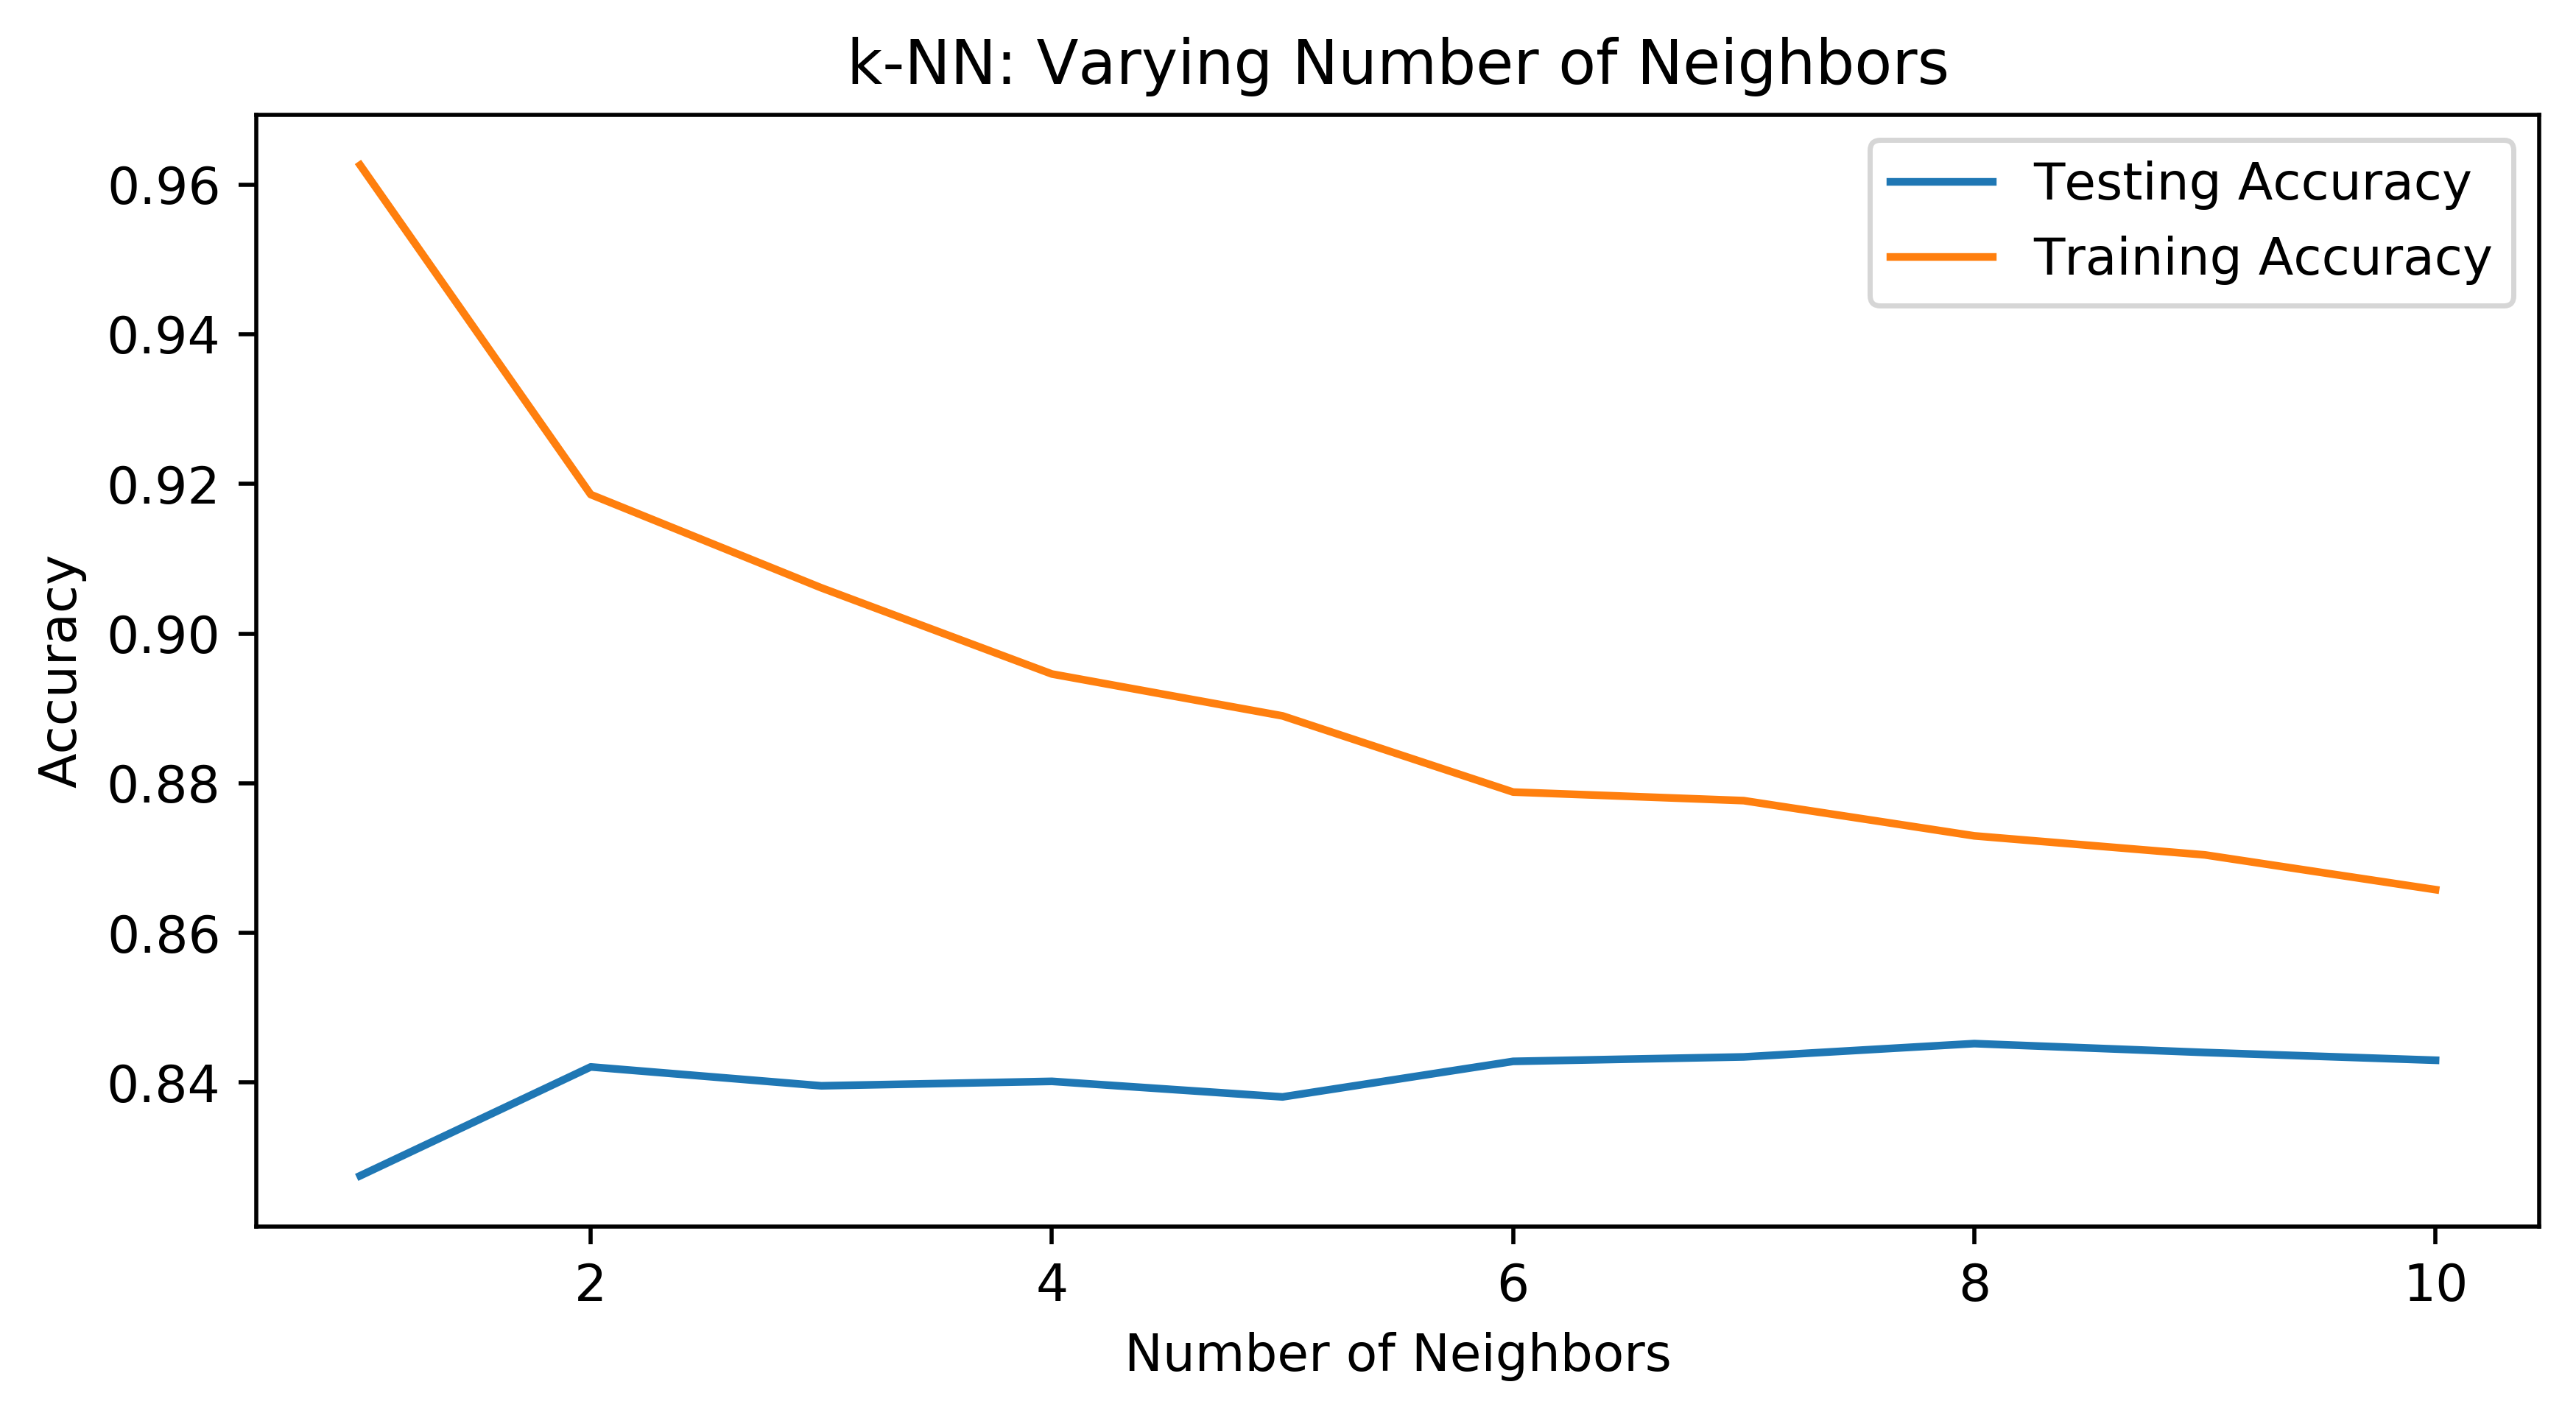

In [44]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
plt.rcParams['figure.dpi'] = 500 #分辨率
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.show()

In [45]:
pd.DataFrame({"Train Accuracy": train_accuracy, "Test Accuracy": test_accuracy})

,Train Accuracy,Test Accuracy
0,0.962595,0.827545
1,0.918575,0.842090
2,0.906107,0.839567
3,0.894593,0.840160
4,0.888995,0.838083
5,0.878817,0.842832
6,0.877672,0.843425
7,0.872964,0.845206
8,0.870420,0.844019
9,0.865776,0.842980


In [46]:
y_pred = knn.predict(X_test)
pred = pd.DataFrame({"Classification": y_test, "Predicted classification": y_pred})
pred

,Classification,Predicted classification
117634,TP/DE,TP/DE
97675,TP/DE,TP/DE
121470,TP/DE,TP/DE
129872,TP/DE,TP/DE
30036,FP,FP
...,...,...
56567,FP,FP
104682,FP,TP/DE
113655,TP/DE,TP/DE
98412,TP/DE,TP/DE


In [ ]:
# Extract sample from ge3, drop useless columns
df = ge4.drop(columns=["classification", "city", "state_name"])

# Get dummy variables
df_d = pd.get_dummies(df)

In [31]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = df_d
y = ge4["classification"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100, stratify=y)

In [32]:
# Create a k-NN classifier with 9 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [33]:
knn.score(X_test, y_test)

0.8138913624220837

In [34]:
y_pred = knn.predict(X_test)
pred = pd.DataFrame({"Classification": y_test, "Predicted classification": y_pred})
pred

,Classification,Predicted classification
117634,TP/DE,TP/DE
97675,TP/DE,TP/DE
121470,TP/DE,TP/DE
129872,TP/DE,TP/DE
30036,FP,FP
...,...,...
56567,FP,FP
104682,FP,TP/DE
113655,TP/DE,TP/DE
98412,TP/DE,TP/DE
